### The Dataset

The dataset is split into 3 classes: Non-Demented, Mild Demented and Moderate Demented.
        
#### Defining the dataset files path:

In [ ]:
import os


filepaths = r"d:\dev\ML lab\Final Project\AlzheimerProject\AlzheimerDataset"
os.chdir(filepaths)

resampledPath = r"d:\dev\ML lab\Final Project\AlzheimerProject\ResampledDataset"

MildDementedPath, ModerateDementedPath, NonDementedPath = map(
    lambda x: os.path.join(filepaths, x),
    os.listdir(filepaths),
)

print(
    "Images Paths:",
    MildDementedPath,
    ModerateDementedPath,
    NonDementedPath,
    sep="\n",
)

### Sample Images:
To get an idea of the data and the classes.

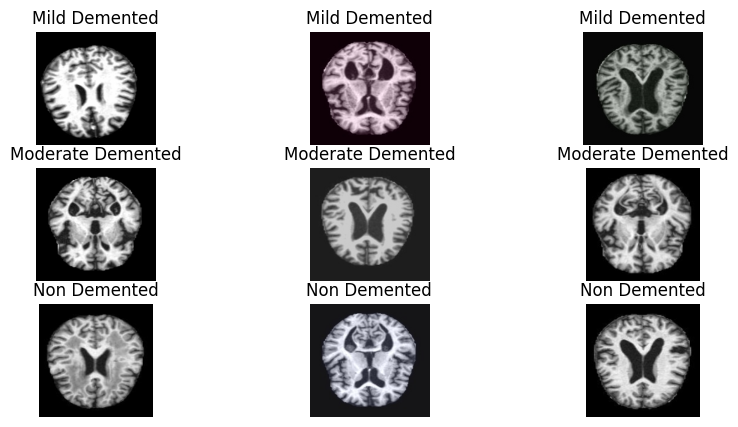

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fig, axs = plt.subplots(3, 3, figsize=(10, 5))

for i, imgPath in enumerate(os.listdir(MildDementedPath)[:3]):
    img = os.path.join(MildDementedPath, imgPath)
    img = mpimg.imread(img)

    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].axis("off")
    axs[i // 3, i % 3].set_title("Mild Demented")

for i, imgPath in enumerate(os.listdir(ModerateDementedPath)[:3]):
    img = os.path.join(ModerateDementedPath, imgPath)
    img = mpimg.imread(img)

    axs[(i + 3) // 3, (i + 3) % 3].imshow(img)
    axs[(i + 3) // 3, (i + 3) % 3].axis("off")
    axs[(i + 3) // 3, (i + 3) % 3].set_title("Moderate Demented")

for i, imgPath in enumerate(os.listdir(NonDementedPath)[:3]):
    img = os.path.join(NonDementedPath, imgPath)
    img = mpimg.imread(img)

    axs[(i + 6) // 3, (i + 6) % 3].imshow(img)
    axs[(i + 6) // 3, (i + 6) % 3].axis("off")
    axs[(i + 6) // 3, (i + 6) % 3].set_title("Non Demented")

plt.show()

# Resampling
We define the paths of the individual classes

In [24]:
# Number of images in each category
MildDementedNum = len(os.listdir(MildDementedPath))
ModerateDementedNum = len(os.listdir(ModerateDementedPath))
NonDementedNum = len(os.listdir(NonDementedPath))

print(f"{MildDementedNum} Mild Demented images", \
          f"{ModerateDementedNum} Moderate Demented images", \
              f"{NonDementedNum} Non Demented images", sep="\n")

17920 Mild Demented images
6464 Moderate Demented images
9600 Non Demented images


In [25]:
# Calculating the average number of images per class
avg = (MildDementedNum + ModerateDementedNum + NonDementedNum) / 3
print(f"Average number of images per class: {avg}")

Average number of images per class: 11328.0


# Undersampling
We need to undersample the majority class (Mild Demented) images to match the average number of images in each class.

In [26]:
# Number of images to be removed from the majority class:
imagesNumToRemove = MildDementedNum - avg

print(
    f"Number of images to be removed from Mild Demented class: \
        {imagesNumToRemove}"
)

Number of images to be removed from Mild Demented class:         6592.0


## Defining the Undersampling fucntion:
This fucntion takes a directory then removes a random given number of images for said directory then copies the remaining images to a new specified directory.

In [27]:
def UnderSampler(inputDir, outputDir, numToRemove):
    """Removes a number of images from the input directory and saves the rest in the output directory.

    Args:
        inputDir (str): The path to the input directory.
        outputDir (str): The path to the output directory.
        numToRemove (int): The number of images to remove from the input directory.
    """
    from numpy.random import choice
    import shutil

    if not os.path.exists(outputDir):
        os.makedirs(outputDir)

    imgsPaths = os.listdir(inputDir)
    numOfImages = len(imgsPaths)

    imgsNumToKeep = int(numOfImages - numToRemove)
    imgsToKeep = choice(
        imgsPaths,
        imgsNumToKeep,
        replace=False,
    )

    for imgToKeep in imgsToKeep:
        shutil.copy(
            os.path.join(inputDir, imgToKeep),
            os.path.join(outputDir, imgToKeep),
        )

#### Calling the Undersampling function on majority class:

In [ ]:
# Define the paths for undersampling:
undersampledPath = os.path.join(resampledPath, "Mild Demented")

# undersample the "Mild Demented" class:
UnderSampler(
    inputDir=MildDementedPath,
    outputDir=undersampledPath,
    numToRemove=imagesNumToRemove,
)

#### Checking the number of files in the majority class directory:

In [29]:
# Number of images in the undersampled class
numOfUndersampledImages = len(os.listdir(undersampledPath))
numOfUndersampledImages

15514

# Oversampling
- We need to oversample the two minority classes to the average number of images per class.

- The technique used here is to initialize a image data generater to modify randomly selected images from the minority class

- The modifications include:
    * Randomly shifting the width of the selected image within a given range.
    * Randomly rotating the selected image within a given range.
    * Randomly shifting the height of the selected image within a given range.
    * Randomly adjusting the shear range of the selected image within a given range.
    * Randomly zooming in and out the selected image within a given range.
    * Randomly fliping the image on its horizontal axes.

- Minority class ModerateDemented and minority class NonDemented.

In [30]:
# Number of images to be generated for each minority class
imagesToGenerateForModerateDemented = avg - ModerateDementedNum
imagesToGenerateForNonDemented = avg - NonDementedNum

print(
    f"Number of images to be generated for Moderate Demented class: \
        {imagesToGenerateForModerateDemented}",
    f"Number of images to be generated for Non Demented class: \
        {imagesToGenerateForNonDemented}", sep="\n"
)

Number of images to be generated for Moderate Demented class:         4864.0
Number of images to be generated for Non Demented class:         1728.0


#### Initializing the image data generator:

In [31]:
# Imports:
from tensorflow.keras.preprocessing.image import( # type: ignore
    ImageDataGenerator,
    img_to_array,
    array_to_img,
    load_img
)

In [32]:
# Initializing the ImageDataGenerator with the optimal augmentation parameters:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.07,
    height_shift_range=0.07,
    shear_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

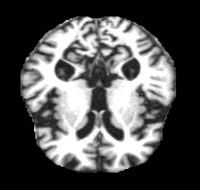

In [33]:
# Testing the generator on a single image:
imageTestGenPath = r"d:\dev\ML lab\Final Project\AlzheimerProject\testMriImage.jpg"
imgTestGen = load_img(imageTestGenPath)
imgTestGen

In [34]:
# Convert the image to a numpy array and reshaping the image:
imgTestGenArray = img_to_array(imgTestGen)
imgTestGenArray = imgTestGenArray.reshape((1,) + imgTestGenArray.shape)
imgTestGenArray.shape

(1, 190, 200, 3)

In [35]:
# Initialize an instance of the generator:
imgsTestGenGen = datagen.flow(
    imgTestGenArray,
    batch_size=1,
)

'Original Image: '

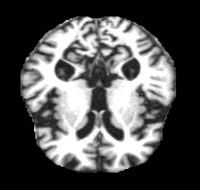

'Augmented Image: '

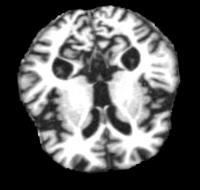

In [36]:
# Getting the generated images:
imgsTestGenAug = next(imgsTestGenGen)
# Converting the image array to an image:
imgTestGenAug = array_to_img(imgsTestGenAug[0])

display("Original Image: ", imgTestGen)
display("Augmented Image: ", imgTestGenAug)

### Defining the Oversampling function:

In [37]:
# Defining the Oversampler function:
def OverSampler(inputDir, outputDir, numToGenerate):
    """
    Oversamples images from the input directory and saves the generated images to the output directory.

    Args:
        inputDir (str): The path to the directory containing the input images.
        outputDir (str): The path to the directory where the generated images will be saved.
        numToGenerate (int): The number of images to generate.

    Returns:
        None
    """
    from numpy.random import choice # type: ignore
    import shutil

    if not os.path.exists(outputDir):
        os.makedirs(outputDir)

    imgsPaths = os.listdir(inputDir)

    imgsToGenFrom = choice(
        imgsPaths,
        int(numToGenerate),
        replace=False,
    )

    for idx, imgToGenFrom in enumerate(imgsToGenFrom):
        img = load_img(os.path.join(inputDir, imgToGenFrom))
        imgArray = img_to_array(img)
        imgArray = imgArray.reshape((1,) + imgArray.shape)

        imgGen = datagen.flow(
            imgArray,
            batch_size=1,
            save_to_dir=outputDir,
            save_prefix=f"aug_{idx}_",
            save_format="jpg",
        )
        
        array_to_img(next(imgGen)[0])
       
    for imgPath in imgsPaths:
        shutil.copy(
            os.path.join(inputDir, imgPath),
            os.path.join(outputDir, imgPath),
        )

### Calling the Oversampling function on the two minority classes:

In [38]:
# Define the paths for oversampling
mederateDementedOversampledPath = os.path.join(
    resampledPath,
    "Moderate Demented",
)
nonDementedOversampledPath = os.path.join(
    resampledPath,
    "Non Demented",
)

# Oversample the "Moderate Demented" class
OverSampler(
    inputDir=ModerateDementedPath,
    outputDir=mederateDementedOversampledPath,
    numToGenerate=imagesToGenerateForModerateDemented,
)

# Oversample the "Non Demented" class
OverSampler(
    inputDir=NonDementedPath,
    outputDir=nonDementedOversampledPath,
    numToGenerate=imagesToGenerateForNonDemented,
)

### Checking the number of files in the minority classes directories:

In [20]:
# Number of oversampled images
numOfOversampledModerateDementedImages = len(
    os.listdir(mederateDementedOversampledPath),
)
numOfOversampledNonDementedImages = len(
    os.listdir(nonDementedOversampledPath),
)

# Display the number of oversampled images:
print(
    f"Number of oversampled Moderate Demented images: \
        {numOfOversampledModerateDementedImages}",
    f"Number of oversampled Non Demented images: \
        {numOfOversampledNonDementedImages}",
    sep="\n",
)

Number of oversampled Moderate Demented images:         11328
Number of oversampled Non Demented images:         11328


# Image Preprocessing:
### Here we need to define two function:
- The first one does the first round of preprocessing, this includes:
    1. Converting the image to grayscale (black and white).
    2. Resizing the image to make it in the optimal dimensions for further processing.
    3. Converting the image into a numpy array.
    4. Stacking the image vertices to make it 3 channels.
    5. Ensuring that the image is in the required shape.
    6. Process the image for input in the second function.
         
- The socond function does the feature extraction using a pre-trained CNN (VGG16)

In [9]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0 # type: ignore
from tensorflow.keras.models import Model# type: ignore
from tensorflow.keras.preprocessing.image import img_to_array# type: ignore
from tensorflow.keras.applications.efficientnet import preprocess_input# type: ignore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math

In [10]:
def load_and_preprocess_image(image_path, image_size=(300, 300)):
    """Load and preprocess an image from the given path.

    Args:
        image_path (str): The path to the image.
        image_size (tuple, int): The size to reshape the images to accourding to. Defaults = (300, 300).

    Returns:
        np.array: The preprocessed image.
    """
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(image_size)  # Resize to target dimensions
    img_array = img_to_array(img)  # Convert to array (height, width, 1)
    img_array = np.repeat(img_array, 3, axis=-1)  # Replicate across 3 channels
    img_array = preprocess_input(img_array)  # EfficientNet specific preprocessing
    return img_array

In [11]:
def preprocess_images_with_cnn(image_dirs, image_size=(300, 300), batch_size=32):
    """
    Preprocess images and extract features using EfficientNetB0.

    Parameters:
    image_dirs (dict): Class directories with structure {class_name: path}
    image_size (tuple): Target image dimensions (default: (300, 300))
    batch_size (int): Batch size for processing (default: 32)

    Returns:
    X (np.ndarray): Feature vectors
    y (np.ndarray): Encoded labels
    le (variable): LabelEncoder model
    """
    # Load EfficientNet model with custom input shape
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        pooling='avg',
        input_shape=(image_size[0], image_size[1], 3)
    )
    model = Model(inputs=base_model.input, outputs=base_model.output)

    # Collect image paths and labels
    image_paths, labels = [], []
    for class_name, directory in image_dirs.items():
        for filename in os.listdir(directory):
            if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".gif")):
                image_paths.append(os.path.join(directory, filename))
                labels.append(class_name)

    # Encode labels numerically
    le = LabelEncoder()
    y = le.fit_transform(labels)

    # Create optimized TensorFlow dataset pipeline
    def data_generator():
        for path in image_paths:
            yield load_and_preprocess_image(path, image_size)

    dataset = tf.data.Dataset.from_generator(
        data_generator,
        output_signature=tf.TensorSpec(shape=(image_size[0], image_size[1], 3), dtype=tf.float32)
    ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    # Compute number of steps
    steps = math.ceil(len(image_paths) / batch_size)

    # Extract features using the CNN model
    X = model.predict(dataset, steps=steps, verbose=1)

    return X, y ,le



In [ ]:
# Define dataset directories
image_dirs = {
    "Non-Demented": r"D:\projects\Modelthon\adeptus-vita-main\ResampledDataset\Non Demented",
    "Mild Demented": r"D:\projects\Modelthon\adeptus-vita-main\ResampledDataset\Mild Demented",
    "Moderate Demented": r"D:\projects\Modelthon\adeptus-vita-main\ResampledDataset\Moderate Demented"
}

# Process images and extract features
X, y ,le= preprocess_images_with_cnn(
    image_dirs,
    image_size=(300, 300),
    batch_size=64
)

In [ ]:
# Save features and labels to disk for future use:
np.save('D:\projects\Modelthon\adeptus-vita-main\Data\fullDatasetFeatures.npy', X)
np.save('D:\projects\Modelthon\adeptus-vita-main\Data\fullDatasetLabels.npy', y)


import pickle

# Save the label encoder to a file
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


In [ ]:
# Load the full dataset
features = np.load('D:\projects\Modelthon\adeptus-vita-main\Data\fullDatasetFeatures.npy')
labels = np.load('D:\projects\Modelthon\adeptus-vita-main\Data\fullDatasetLabels.npy')

# Split into training and temporary sets (70% train, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    features, labels, test_size=0.3, stratify=labels, random_state=42
)

# Split the temporary set into validation and test sets (15% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Save the splits to disk
np.save('D:\projects\Modelthon\adeptus-vita-main\Data\X_train.npy', X_train)
np.save('D:\projects\Modelthon\adeptus-vita-main\Data\y_train.npy', y_train)
np.save('D:\projects\Modelthon\adeptus-vita-main\Data\X_val.npy', X_val)
np.save('D:\projects\Modelthon\adeptus-vita-main\Data\y_val.npy', y_val)
np.save('D:\projects\Modelthon\adeptus-vita-main\Data\X_test.npy', X_test)
np.save('D:\projects\Modelthon\adeptus-vita-main\Data\y_test.npy', y_test)

In [13]:
import numpy as np

# Load datasets
X_train = np.load(r"D:\projects\Modelthon\adeptus-vita-main\Data\X_train.npy")
y_train = np.load(r"D:\projects\Modelthon\adeptus-vita-main\Data\y_train.npy")
X_val = np.load(r"D:\projects\Modelthon\adeptus-vita-main\Data\X_val.npy")
y_val = np.load(r"D:\projects\Modelthon\adeptus-vita-main\Data\y_val.npy")
X_test = np.load(r"D:\projects\Modelthon\adeptus-vita-main\Data\X_test.npy")
y_test = np.load(r"D:\projects\Modelthon\adeptus-vita-main\Data\y_test.npy")


In [14]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam, SGD, RMSprop # type: ignore

def objective(trial):
    """
    Objective function for Optuna to optimize an ANN hyperparameters.

    Parameters:
    - trial (optuna.trial.Trial): Trial object used to suggest hyperparameter values.

    Returns:
    - float: Best validation accuracy achieved during training (used by Optuna to evaluate this trial).
    """

    # Suggest hyperparameters to try
    activation = trial.suggest_categorical("activation", ["relu", "sigmoid", "tanh"])
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "sgd", "rmsprop"])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    units_per_layer = trial.suggest_categorical("units_per_layer", [64, 128, 256])

    # Choose optimizer with the suggested learning rate
    if optimizer_name == "adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == "sgd":
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    # Build the ANN model
    model = Sequential()

    # Input layer
    model.add(Dense(units_per_layer, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))

    # Additional hidden layers
    for _ in range(num_layers - 1):  # First layer already added
        model.add(Dense(units_per_layer, activation=activation))
        model.add(Dropout(dropout_rate))

    # Output layer with softmax for multiclass classification
    model.add(Dense(len(set(y_train)), activation="softmax"))

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",  # y_train is assumed to be label-encoded
        metrics=["accuracy"]
    )

    # Train the model silently
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        verbose=0  # Suppress output during Optuna trials
    )

    # Return the highest validation accuracy during training
    return max(history.history["val_accuracy"])


d:\projects\Modelthon\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)


# Print best hyperparameters
best_trial = study.best_trial
print(f"Best Validation Accuracy: {best_trial.value:.4f}")
for key, value in best_trial.params.items():
    print(f"{key}: {value}")


[I 2025-05-13 22:46:37,622] A new study created in memory with name: no-name-7299093b-e82a-4b2f-b25c-7ad3d71ecbba
d:\projects\Modelthon\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-05-13 22:48:27,995] Trial 0 finished with value: 0.8745903968811035 and parameters: {'activation': 'tanh', 'optimizer': 'sgd', 'learning_rate': 0.009164665914376332, 'dropout_rate': 0.3038617738814019, 'num_layers': 3, 'units_per_layer': 256}. Best is trial 0 with value: 0.8745903968811035.
[I 2025-05-13 22:50:48,670] Trial 1 finished with value: 0.8739946484565735 and parameters: {'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.005894595733908377, 'dropout_rate': 0.3339373848032753, 'num_layers': 1, 'units_per_layer': 256

Best Validation Accuracy: 0.9477
activation: relu
optimizer: rmsprop
learning_rate: 6.940333767924885e-05
dropout_rate: 0.13851191758305362
num_layers: 2
units_per_layer: 256


In [16]:
# Train final model with best parameters
def build_final_model(params):
    """
    Builds and compiles a final ANN model using the best hyperparameters.

    Parameters:
    - params (dict): Dictionary containing the best hyperparameters:
        - "activation" (str): Activation function for hidden layers ("relu", "sigmoid", "tanh").
        - "optimizer" (str): Optimizer name ("adam", "sgd", "rmsprop").
        - "learning_rate" (float): Learning rate for the optimizer.
        - "dropout_rate" (float): Dropout rate between layers.
        - "num_layers" (int): Total number of dense layers (including the first one).
        - "units_per_layer" (int): Number of neurons in each dense layer.

    Returns:
    - model (tf.keras.Model): Compiled Keras sequential model ready for training.
    """
    
    # Select optimizer based on the name and learning rate
    if params["optimizer"] == "adam":
        optimizer = Adam(learning_rate=params["learning_rate"])
    elif params["optimizer"] == "sgd":
        optimizer = SGD(learning_rate=params["learning_rate"])
    else:
        optimizer = RMSprop(learning_rate=params["learning_rate"])

    # Initialize a Sequential model
    model = Sequential()
    
    # Input layer (first dense layer)
    model.add(Dense(params["units_per_layer"], activation=params["activation"], input_shape=(X_train.shape[1],)))
    model.add(Dropout(params["dropout_rate"]))
    
    # Additional hidden layers (if any)
    for _ in range(params["num_layers"] - 1):
        model.add(Dense(params["units_per_layer"], activation=params["activation"]))
        model.add(Dropout(params["dropout_rate"]))
    
    # Output layer with softmax for multi-class classification
    model.add(Dense(len(set(y_train)), activation="softmax"))

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",  # suitable when y_train is label-encoded
        metrics=["accuracy"]
    )
    
    return model

In [17]:
ANN_model = build_final_model(best_trial.params)
ANN_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

d:\projects\Modelthon\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6501 - loss: 0.7738 - val_accuracy: 0.8257 - val_loss: 0.3939
Epoch 2/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8195 - loss: 0.4003 - val_accuracy: 0.8388 - val_loss: 0.3482
Epoch 3/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8462 - loss: 0.3413 - val_accuracy: 0.8099 - val_loss: 0.3817
Epoch 4/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8567 - loss: 0.3124 - val_accuracy: 0.8621 - val_loss: 0.2973
Epoch 5/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8697 - loss: 0.2922 - val_accuracy: 0.8716 - val_loss: 0.2827
Epoch 6/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8783 - loss: 0.2708 - val_accuracy: 0.8871 - val_loss: 0.2520
Epoch 7/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8884 - loss: 0.2566 - val_accuracy: 0.8931 - val_loss: 0.2429
Epoch 8/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8909 - loss: 0.2449 - val_accuracy: 0.

In [19]:
ANN_model.save(r'D:\projects\Modelthon\adeptus-vita-main\Models\ANNmodel.keras')
ANN_model.save(r"D:\projects\Modelthon\adeptus-vita-main\Models\ANN.h5")

### Defining the function to show the required metrics for a given classifier

In [20]:
def MetricsReport(clf, X_test, y_test):
    """Shows the accuracy, precision, recall, f1-score, and AUC of a classifier.

    Args:
        clf (model): The classifier to evaluate.
        X_test (np.array): The test features.
        y_test (np.array): The test labels.
    Returns:
        None
    """
    
    from sklearn.metrics import (
        accuracy_score,
        precision_score,
        recall_score,
        f1_score,
        roc_auc_score
    )
    import numpy as np

    # Predict probabilities
    y_pred_probs = clf.predict(X_test)

    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # ROC AUC: needs probabilities and integer labels
    try:
        auc = roc_auc_score(y_test, y_pred_probs, multi_class="ovr")
    except ValueError:
        auc = float('nan')  # Handle if something goes wrong

    print(
        f"Accuracy:   {accuracy:.4f}",
        f"Precision:  {precision:.4f}",
        f"Recall:     {recall:.4f}",
        f"F1-score:   {f1:.4f}",
        f"AUC:        {auc:.4f}",
        sep="\n",
    )


In [21]:
# Display the metrics report:
MetricsReport(ANN_model, X_test, y_test)

210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:   0.9372
Precision:  0.9393
Recall:     0.9372
F1-score:   0.9366
AUC:        0.9904


### Defining the function to predict a new instance from a given classifier

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0  # type: ignore # Pre-trained model
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore
from tensorflow.keras.applications.efficientnet import preprocess_input # type: ignore
from IPython.display import display
from PIL import Image
import os


def load_and_preprocess_image(image_path, image_size):
    """
    Loads and preprocesses an image for EfficientNetB0.

    Parameters:
    - image_path (str): Path to the image file.
    - image_size (tuple): Target size to resize the image.

    Returns:
    - Preprocessed image as a NumPy array.
    """
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(image_size)  # Resize to target dimensions
    img_array = img_to_array(img)  # Convert to array (height, width, 1)
    img_array = np.repeat(img_array, 3, axis=-1)  # Replicate across 3 channels
    img_array = preprocess_input(img_array)  # EfficientNet specific preprocessing
    return img_array
    #img = load_img(image_path, target_size=image_size)
    #img = img_to_array(img)
    #img = preprocess_input(img)  # Normalize for EfficientNetB0
    #return img


def PredictNewInstance(image_path, model, *, showImage=True, imageSize=(300, 300)):
    """
    Predicts the class of a new image using a trained classifier and features extracted from EfficientNetB0.

    Parameters:
    - image_path (str): Path to the input image.
    - model (keras.Model or sklearn-like): Classifier model that takes image features as input.
    - showImage (bool): Whether to display the input image (default: True).
    - imageSize (tuple): Size to resize the image for EfficientNetB0 input (default: (300, 300)).

    Returns:
    - prediction (int): Predicted class.
    """
    # Display the image if requested
    if showImage:
        image = load_img(image_path)
        display(image)

    # Load and preprocess the image
    img = load_and_preprocess_image(image_path, imageSize)

    # Load EfficientNetB0 as a feature extractor (without the final classification layers)
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,      # Exclude final classification layer
        pooling='avg',          # Global average pooling
        input_shape=(imageSize[0], imageSize[1], 3)
    )
    feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

    # Create a batch with a single image
    img_batch = np.expand_dims(img, axis=0)

    # Extract CNN features
    features = feature_extractor.predict(img_batch)

    # Predict class probabilities using the given classifier
    prediction_probs = model.predict(features)

    # Get the class with the highest probability
    prediction = np.argmax(prediction_probs, axis=1)[0]
    
    with open('Models\label_encoder.pkl', 'rb') as f:
        label_encoder = pickle.load(f)
    
    predicted_label = label_encoder.inverse_transform([prediction])[0]

    return predicted_label


<>:77: SyntaxWarning: invalid escape sequence '\l'
<>:77: SyntaxWarning: invalid escape sequence '\l'
C:\Users\HP\AppData\Local\Temp\ipykernel_14148\379553831.py:77: SyntaxWarning: invalid escape sequence '\l'
  with open('Models\label_encoder.pkl', 'rb') as f:


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\HP\AppData\Local\Temp\ipykernel_18652\1735867424.py:3: SyntaxWarning: invalid escape sequence '\l'
  with open('Models\label_encoder.pkl', 'rb') as f:


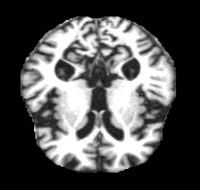

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


np.str_('Moderate Demented')

In [ ]:
# Predicting the class of a new image using the XGBoost Classifier:
import pickle

with open('Models\label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

img_path = r"D:\projects\Modelthon\adeptus-vita-main\testMriImage.jpg"

predicted_label = PredictNewInstance(img_path, ANN_model, showImage=True)

predicted_label

## Exporting the ANN classifier to disk:

In [ ]:
ANN_model.save(r"D:\projects\Modelthon\adeptus-vita-main\Models\ANN.h5")

Model saved successfully.


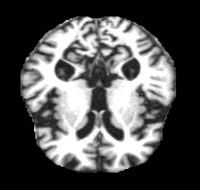

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


np.str_('Moderate Demented')

In [7]:
# Predicting the class of a new image using the ANN Classifier:
import pickle
from tensorflow.keras.models import load_model # type: ignore

# Load the model from disk
model_path = r"Models\ANN.h5"
ANN_model = load_model(model_path)

with open(r'Models\label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

img_path = r"D:\projects\Modelthon\adeptus-vita-main\testMriImage.jpg"

predicted_label = PredictNewInstance(img_path, ANN_model, showImage=True)

predicted_label